-22.245
-18.245
-14.245000000000001
-10.245000000000001
-6.245
-2.245
1.755
5.755
9.754999999999999
13.754999999999999
17.755
21.755
25.755
29.755
33.755
37.755
41.755
45.755
49.755
53.755
57.755
61.755
65.755
69.755
73.755
77.755
81.755
85.755
89.755
93.755
97.755
101.755
105.755
109.755
113.755


C:\Users\hocke_yr5sylf\anaconda3\Lib\site-packages\matplotlib\axes\_base.py:2917: RuntimeWarning: overflow encountered in scalar subtract
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


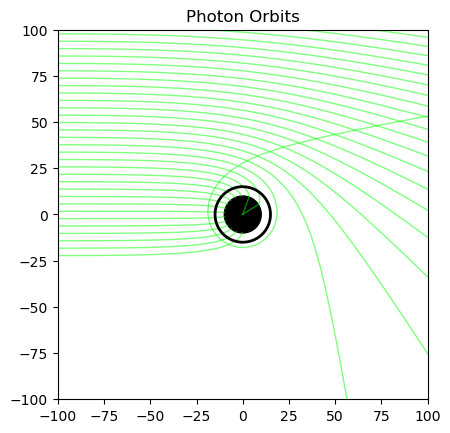

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
gravlens.py
Created on Tue May 28 11:50:24 2019
@author: nolte
D. D. Nolte, Introduction to Modern Dynamics: Chaos, Networks, Space and Time, 2nd ed. (Oxford,2019)
"""
 
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from matplotlib import pyplot as plt
from matplotlib import cm
import time
import os
 
plt.close('all')
 
def create_circle():
    circle = plt.Circle((0,0), radius= 10, color = 'black')
    return circle
 
def show_shape(patch):
    ax=plt.gca()
    ax.add_patch(patch)
    plt.axis('scaled')
#     plt.show()
     
def refindex(x,y):
     
    A = 10
    eps = 1e-6
     
    rp0 = np.sqrt(x**2 + y**2);
         
    n = 1/(1 - A/(rp0+eps))
    fac = np.abs((1-9*(A/rp0)**2/8))   # approx correction to Eikonal
    nx = -fac*n**2*A*x/(rp0+eps)**3
    ny = -fac*n**2*A*y/(rp0+eps)**3
      
    return [n,nx,ny]
 
def flow_deriv(x_y_z,tspan):
    x, y, z, w = x_y_z
     
    [n,nx,ny] = refindex(x,y)
         
    yp = np.zeros(shape=(4,))
    yp[0] = z/n
    yp[1] = w/n
    yp[2] = nx
    yp[3] = ny
     
    return yp
                 
for loop in range(-5,30):
     
    xstart = -100
    ystart = -2.245 + 4*loop
    print(ystart)
     
    [n,nx,ny] = refindex(xstart,ystart)
 
 
    y0 = [xstart, ystart, n, 0]
 
    tspan = np.linspace(1,400,2000)
 
    y = integrate.odeint(flow_deriv, y0, tspan)
 
    xx = y[1:2000,0]
    yy = y[1:2000,1]
 
 
    plt.figure(1)
    lines = plt.plot(xx,yy)
    plt.setp(lines, linewidth=1, color="lime", alpha=0.5)
#     plt.show()
    plt.title('Photon Orbits')
     
c = create_circle()
show_shape(c)
axes = plt.gca()
axes.set_xlim([-100,100])
axes.set_ylim([-100,100])
 
# Now set up a circular photon orbit
xstart = 0
ystart = 15
 
[n,nx,ny] = refindex(xstart,ystart)
 
y0 = [xstart, ystart, n, 0]
 
tspan = np.linspace(1,94,1000)
 
y = integrate.odeint(flow_deriv, y0, tspan)
 
xx = y[1:1000,0]
yy = y[1:1000,1]
 
plt.figure(1)
lines = plt.plot(xx,yy)
plt.setp(lines, linewidth=2, color = 'black')
plt.show()